In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Generating data

In [23]:
sample_size = int(1e2);
dimension = (sample_size,1);


x = np.reshape(np.linspace(0,1, num=sample_size),dimension)
y = np.reshape(np.sin(2*np.pi*x),dimension)

In [24]:
#Observations

N_obs = 10

#data = np.zeros((10,int(sample_size)))

t = np.sin(2*np.pi*x) + np.reshape(np.random.normal(size=sample_size,scale=0.35),dimension);

#for i in range(N_obs):
#    np.random.seed(i**2)
#    t[i] = np.sin(2*np.pi*x) + np.random.normal(size=sample_size,scale=0.35);
#    break

#data = np.sin(2*np.pi*x) + (np.e**x)*1.7 + np.random.normal(size=sample_size,scale=0.35);

In [25]:
x.shape

(100, 1)

In [26]:
t.shape

(100, 1)

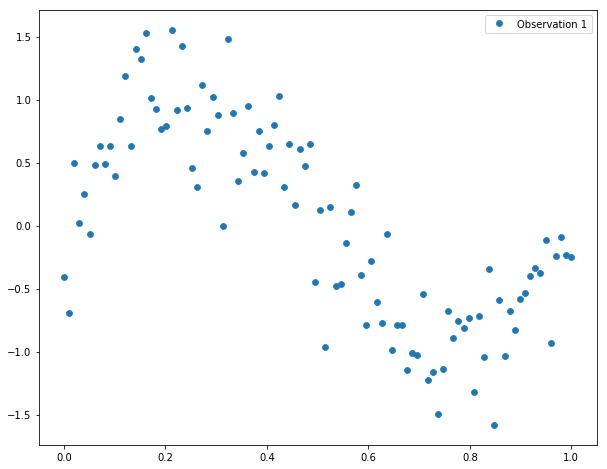

In [28]:
plt.figure(figsize=(10,8))
for i in range(1):
    legend = "Observation "+str(i+1)
    plt.plot(x,t,'o',markeredgewidth=0.75,label=legend)
    #plt.plot(x[0],t[i],'o',markerfacecolor='none',markeredgewidth=0.75,label=legend)
    plt.legend()

#### Defining the function

Now, we'll see the problem of $ y(\boldsymbol{x},\boldsymbol{w}) = w_0 + w_1 x^1 + ... + w_D x^D $ and make some changes. Let's choose some arbitrary function class $ \phi(x) $ and then, our previous relation becomes $ y(\boldsymbol{x},\boldsymbol{\phi}) = w_0 + w_1 \phi_1 + ... + w_D \phi_D $, such that $ \phi_i $ are apparently linearly independent. So, in this example we'll choose the function $$ \phi_i(x| \mu_i, s) = \exp \left( -\frac{(x-\mu_i)^2}{s^2} \right) $$

Defining the model matrix

<font color="red">Missing to define the covariance matrix $\sum ^{-1}$ and replace it in $ s $</font>

Number of observations

In [13]:
M = 10

In [14]:
def f_phi(x,mu,s=1):
    return np.e**(-(x-mu)**2 / s**2)

Number of basis functions

In [15]:
N = 3

phi = np.zeros((M,N))

In [29]:
np.linalg.det(x.T@x)

33.5016835016835

In [30]:
w = ((np.linalg.inv(x.T@x))@x.T)@t

In [ ]:
def linear_regressor(x_data, y_data, M, pseudo=True):
    M = M+1
    
    xsum = np.zeros((1,M*2))

    for i in range(M*2):
        xsum[0][i] = sum(f_phi(x_data,i/M))
    
    S = np.zeros((M,M))
    Y = np.zeros((1,M))

    for i in range(M):
        for j in range(M):
            S[i][j] = xsum[0][i+j]
        Y[0][i] = sum(y_data*(f_phi(x_data,i/M)))
    
    # S * W = Y

    if pseudo == False:
        W = np.linalg.solve(S,Y.T)
        W = W.T
    else:
        S_aux = np.dot(S,S.T) # S * S.T
        S_aux = np.linalg.inv(S_aux)
        S_inv = np.dot(S_aux,S.T) # S_aux * S.T
        W = np.dot(Y,S_inv) # Y * S_inv
    
    y_pred = 0
    
    x = np.linspace(x_data[0],x_data[len(x_data)-1],50)

    for i in range(M):
        y_pred = W[0][i]*(f_phi(x_data,i/M)) + y_pred
    
    return y_pred

y_pred_test = linear_regressor(x,t[0],50,False)

In [ ]:
plt.plot(x,y_pred_test)